# Análise Exploratória


In [1]:
# Import libraries

## Basic
import numpy as np
import scipy as sp
import pandas as pd

## Graph
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from seaborn_qqplot import pplot

## Machine Learning
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import r2_score
from scipy.stats import shapiro
from sklearn import metrics

In [18]:
# Import data
path = "../data/raw/freesurfer_stats_REGIONS_T1_ANALYSIS.xlsx"

volumePath = 'Volume';
gyriSulciLHPath = 'Gyri+Sulci LH';
gyriSulciRHPath = 'Gyri+Sulci RH';

volumeDataRaw = pd.read_excel(path, sheet_name = volumePath, skiprows=[1])
gyriSulciLHDataRaw = pd.read_excel(path, sheet_name = gyriSulciLHPath, skiprows = [1]);
gyriSulciRHDataRaw = pd.read_excel(path, sheet_name = gyriSulciRHPath, skiprows = [1]);

volumeDataRaw

Unnamed: 0 Unnamed: 1 Unnamed: 2         #eTIV  Brain-Stem  CC_Anterior  \
0      c9o_02         ??         ??  1.913195e+06     28663.3       1537.6   
1      c9o_03         ??         ??  1.156390e+06     17449.3        790.4   
2      c9o_04         ??         ??  1.841581e+06     22053.6       1559.7   
3      c9o_05         ??         ??  1.406566e+06     18810.9        857.5   
4      c9o_06         ??         ??  1.191194e+06     20039.0        808.5   
..        ...        ...        ...           ...         ...          ...   
86     vap_23         ??         ??  1.322953e+06     17890.6        919.7   
87     vap_24         ??         ??  1.199364e+06     17381.8        846.1   
88     vap_25         ??         ??  1.468567e+06     17870.6       1043.6   
89     vap_26         ??         ??  1.548146e+06     19757.0        845.5   
90     vap_27         ??         ??  1.051132e+06     20726.5       1204.3   

    CC_Central  CC_Mid_Anterior  CC_Mid_Posterior  CC_Posterior  ...  \
0        621.4            617.7             653.4        1164.1  ...   
1        593.5            562.1             461.4         953.7  ...   
2        509.1            506.2             438.4        1264.5  ...   
3        521.3            644.0             532.3        1006.9  ...   
4        578.2            507.3             566.1        1086.1  ...   
..         ...              ...               ...           ...  ...   
86       647.8            687.5             635.3        1119.6  ...   
87       482.6            604.1             509.2        1000.0  ...   
88       503.1            805.1             672.8        1281.2  ...   
89       509.0            633.7             665.3        1135.4  ...   
90       566.8            626.1             615.2        1137.7  ...   

    Left-choroid-plexus  Right-Accumbens-area  Right-Amygdala  Right-Caudate  \
0                 789.2                 553.2          2259.6         3862.7   
1                 451.4                 435.5          1544.5         2351.5   
2                 641.1                 477.2          2025.3         4121.0   
3                 501.2                 461.3          1792.8         3244.0   
4                 359.4                 472.3          1727.0         2478.9   
..                  ...                   ...             ...            ...   
86                352.4                 457.7          1779.2         2532.0   
87                661.5                 584.2          1627.5         2878.1   
88                335.9                 567.4          1840.3         3226.1   
89                561.3                 502.8          1922.9         3007.3   
90                503.7                 542.3          1563.0         3594.5   

    Right-Hippocampus  Right-Pallidum  Right-Putamen  Right-Thalamus-Proper  \
0              4724.4          2440.8         5280.0                 6472.0   
1              3456.3          1366.0         4133.9                 5943.8   
2              4067.5          1935.9         5710.9                 5816.0   
3              4172.3          2022.7         4721.3                 6363.9   
4              3984.6          1819.5         4093.9                 5621.5   
..                ...             ...            ...                    ...   
86             4153.4          1777.6         3912.2                 6356.7   
87             3348.3          1510.5         3994.4                 5838.5   
88             3878.7          1737.4         4916.4                 7479.7   
89             4358.3          1763.1         4352.6                 7026.5   
90             3925.3          1673.3         4686.8                 6295.2   

    Right-VentralDC  Right-choroid-plexus  
0            5113.1                 791.4  
1            3466.8                 533.1  
2            4098.7                 608.5  
3            3850.8                 469.1  
4            3681.4                 415.2  
..              ...        

In [17]:
# Data shape and missing values

## Volume
volumeRows = volumeDataRaw.shape[0];
volumeColumns = volumeDataRaw.shape[1];
volumeMissing = volumeDataRaw.isnull().sum().sum();

## Gyri+Sulci LH
gsLHRows = gyriSulciLHDataRaw.shape[0];
gsLHColumns = gyriSulciLHDataRaw.shape[1];
gsLHMissing = gyriSulciLHDataRaw.isnull().sum().sum();

## Gyri+Sulci RH
gsRHRows = gyriSulciRHDataRaw.shape[0];
gsRHColumns = gyriSulciRHDataRaw.shape[1];
gsRHMissing = gyriSulciRHDataRaw.isnull().sum().sum();

## Summary
dataSummary = pd.DataFrame({'Data' : ['Volume', 'Gyri+Sulci LH',  'Gyri+Sulci RH'],
                              'Rows' : [volumeRows, gsLHRows, gsRHRows], 
                              'Columns' : [volumeColumns, gsLHColumns, gsRHColumns],
                              'Missing' : [volumeMissing, gsLHMissing, gsRHMissing]});
print("Table 1: Data Summary")
print(dataSummary)

Table 1: Data Summary
            Data  Rows  Columns  Missing
0         Volume    91       28        0
1  Gyri+Sulci LH    91       77        0
2  Gyri+Sulci RH    91       77        0


In [4]:
# Cleaning Data

## Copy dataframes and drop first row
volumeData = pd.DataFrame(volumeDataRaw);
gsLHData = pd.DataFrame(gyriSulciLHDataRaw);
gsRHData = pd.DataFrame(gyriSulciRHDataRaw);

## Drop unnamed columns
volumeData.drop(["Unnamed: 1", 'Unnamed: 2'], axis = 1, inplace = True);
gsLHData.drop(["Unnamed: 1", 'Unnamed: 2'], axis = 1, inplace = True);
gsRHData.drop(["Unnamed: 1", 'Unnamed: 2'], axis = 1, inplace = True);

## Rename first column
volumeData.rename(columns = {'Unnamed: 0' : 'subject'}, inplace = True);
gsLHData.rename(columns = {'Unnamed: 0' : 'subject'}, inplace = True);
gsRHData.rename(columns = {'Unnamed: 0' : 'subject'}, inplace = True);

## New column: ALS
### Map Values
#### Legend
#### 0 = control
#### 1 =  ALS confirmed
volumeData['als'] = 1
gsLHData['als'] = 1
gsRHData['als'] = 1
volumeData.loc[volumeData['subject'].str.startswith('ctl'), 'als'] = 0
gsLHData.loc[gsLHData['subject'].str.startswith('ctl'), 'als'] = 0
gsRHData.loc[gsRHData['subject'].str.startswith('ctl'), 'als'] = 0

## New column: Group
volumeData['group'] = 0
gsLHData['group'] = 0
gsRHData['group'] = 0

## Group: Map Values
### Legend
### 0 = control
### 1 = sporadic ALS
volumeData.loc[volumeData['subject'].str.startswith('sals'), 'group'] = 1
gsLHData.loc[gsLHData['subject'].str.startswith('sals'), 'group'] = 1
gsRHData.loc[gsRHData['subject'].str.startswith('sals'), 'group'] = 1

### 2 = c9o ALS
volumeData.loc[volumeData['subject'].str.startswith('c9o'), 'group'] = 2
gsLHData.loc[gsLHData['subject'].str.startswith('c9o'), 'group'] = 2
gsRHData.loc[gsRHData['subject'].str.startswith('c9o'), 'group'] = 2

### 3 = vapb ALS
volumeData.loc[volumeData['subject'].str.startswith('vap'), 'group'] = 3
gsLHData.loc[gsLHData['subject'].str.startswith('vap'), 'group'] = 3
gsRHData.loc[gsRHData['subject'].str.startswith('vap'), 'group'] = 3

In [5]:
# Merge all data into one dataframe
allData = pd.DataFrame(volumeData)
allData = allData.merge(gsLHData, how = 'inner', on = ['subject', 'als', 'group'])
allData = allData.merge(gsRHData, how = 'inner', on = ['subject', 'als', 'group'])
allData

subject         #eTIV  Brain-Stem  CC_Anterior  CC_Central  \
0   c9o_02  1.913195e+06     28663.3       1537.6       621.4   
1   c9o_03  1.156390e+06     17449.3        790.4       593.5   
2   c9o_04  1.841581e+06     22053.6       1559.7       509.1   
3   c9o_05  1.406566e+06     18810.9        857.5       521.3   
4   c9o_06  1.191194e+06     20039.0        808.5       578.2   
..     ...           ...         ...          ...         ...   
86  vap_23  1.322953e+06     17890.6        919.7       647.8   
87  vap_24  1.199364e+06     17381.8        846.1       482.6   
88  vap_25  1.468567e+06     17870.6       1043.6       503.1   
89  vap_26  1.548146e+06     19757.0        845.5       509.0   
90  vap_27  1.051132e+06     20726.5       1204.3       566.8   

    CC_Mid_Anterior  CC_Mid_Posterior  CC_Posterior  Left-Accumbens-area  \
0             617.7             653.4        1164.1                538.5   
1             562.1             461.4         953.7                394.1   
2             506.2             438.4        1264.5                455.6   
3             644.0             532.3        1006.9                467.0   
4             507.3             566.1        1086.1                400.6   
..              ...               ...           ...                  ...   
86            687.5             635.3        1119.6                470.8   
87            604.1             509.2        1000.0                528.7   
88            805.1             672.8        1281.2                533.0   
89            633.7             665.3        1135.4                513.3   
90            626.1             615.2        1137.7                539.3   

    Left-Amygdala  ...  S_parieto_occipital_y  S_pericallosal_y  \
0          1982.4  ...                  1.950             1.697   
1          1273.4  ...                  2.017             2.134   
2          1868.8  ...                  2.160             1.901   
3          1700.9  ...                  2.018             2.397   
4          1626.2  ...                  2.085             1.820   
..            ...  ...                    ...               ...   
86         1530.8  ...                  2.134             2.089   
87         1545.7  ...                  2.029             1.591   
88         1779.1  ...                  2.190             1.826   
89         1583.9  ...                  2.085             1.788   
90         1535.8  ...                  1.980             2.244   

    S_postcentral_y  S_precentral-inf-part_y  S_precentral-sup-part_y  \
0             1.961                    2.227                    1.935   
1             2.003                    2.151                    2.115   
2             1.704                    2.282                    2.112   
3             1.967                    2.242                    2.207   
4             1.807                    2.352                    2.021   
..              ...                      ...                      ...   
86            1.797                    2.288                    2.026   
87            1.857                    2.279                    2.149   
88            1.911                    2.293                    2.262   
89            1.962                    2.313                    1.975   
90            2.163                    2.201                    2.078   

    S_suborbital_y  S_subparietal_y  S_temporal_inf_y  S_temporal_sup_y  \
0            2.186            2.161             2.308             2.176   
1            2.467            2.327             2.404             2.442   
2            2.839            2.255             2.410             2.354   
3            2.513            2.272             2.389             2.351   
4            2.646            2.316             2.607             2.329   
..             ...              ...               ...               ...   
86           2.801            2.231             2.442             2.481   
87           2.456         

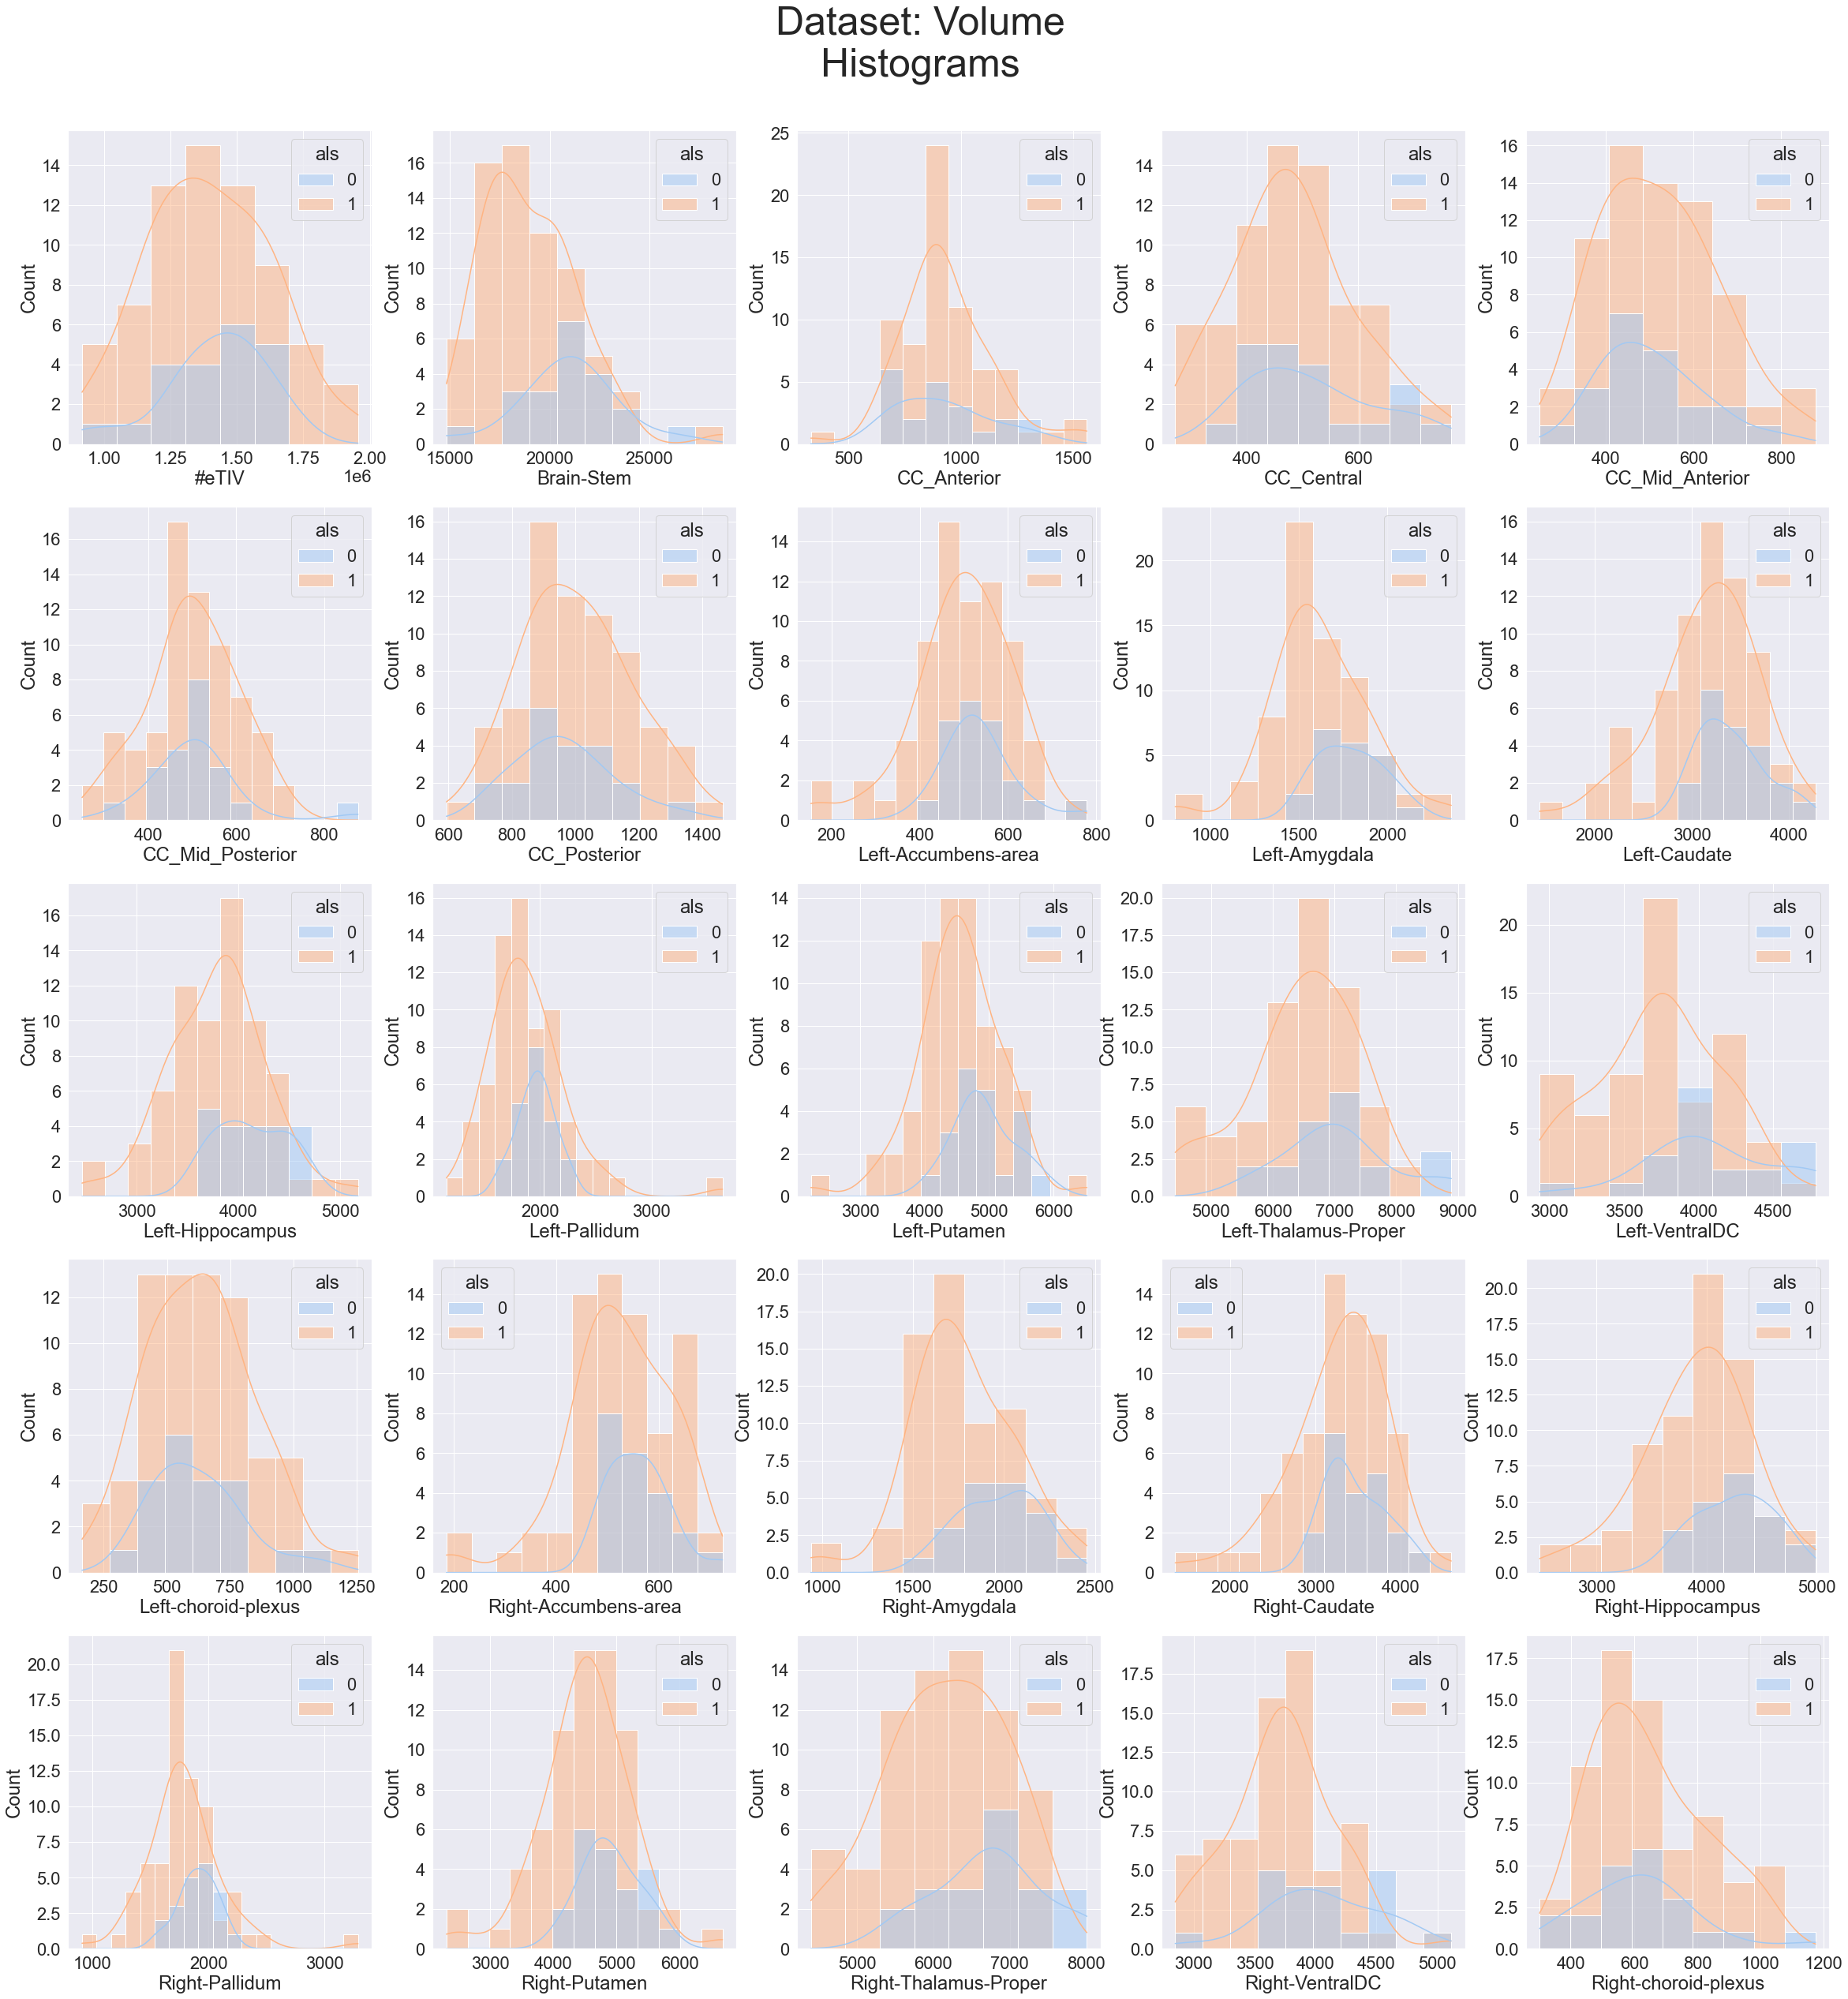

In [24]:
# Plot grid with linear regressions and display R-Squared for each model
fig, axes = plt.subplots(5, 5, figsize = (40, 40))
fig.subplots_adjust(top = 0.925);
fig.suptitle('Dataset: Volume\nHistograms', fontsize = 50)

gr = 1;
for i in range(0, 5):
    for j in range(0, 5):
        sns.set(font_scale = 2);
        sns.histplot(ax = axes[i, j],
                     x = volumeData.iloc[:,gr],
                     hue = volumeData['als'],
                     palette = 'pastel',
                     kde = True)
        gr = gr + 1

/home/ffrazatto/.virtualenvs/mjolnir/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ffrazatto/.virtualenvs/mjolnir/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


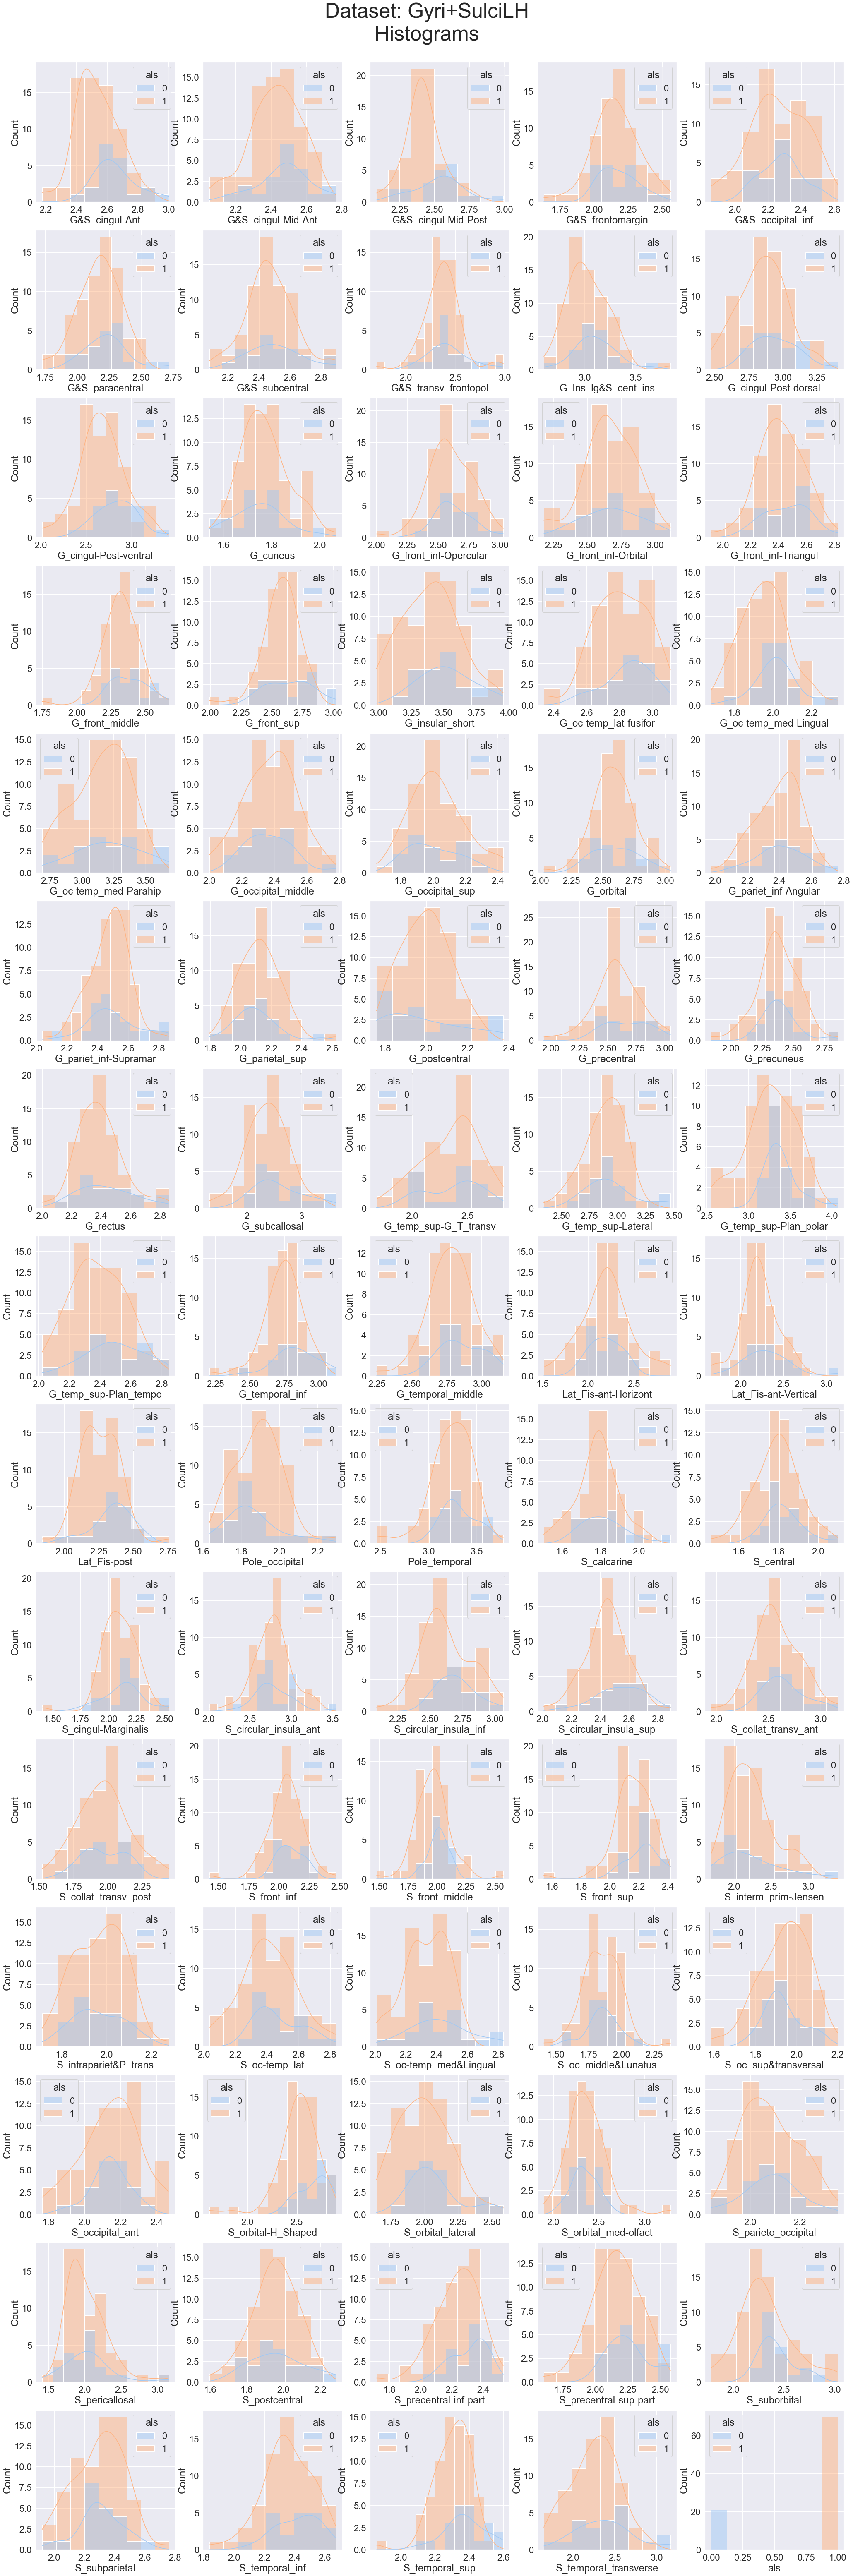

In [31]:
# Plot grid with linear regressions and display R-Squared for each model
fig, axes = plt.subplots(15, 5, figsize = (35, 100))  
fig.subplots_adjust(top = 0.96);
fig.suptitle('Dataset: Gyri+SulciLH\nHistograms', fontsize = 50)

gr = 1;
for i in range(0, 15):
    for j in range(0, 5):
        sns.histplot(ax = axes[i, j],
                     x = gsLHData.iloc[:,gr],
                     hue = gsLHData['als'],
                     palette = 'pastel',
                     kde = True)
        gr = gr + 1

/home/ffrazatto/.virtualenvs/mjolnir/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/ffrazatto/.virtualenvs/mjolnir/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


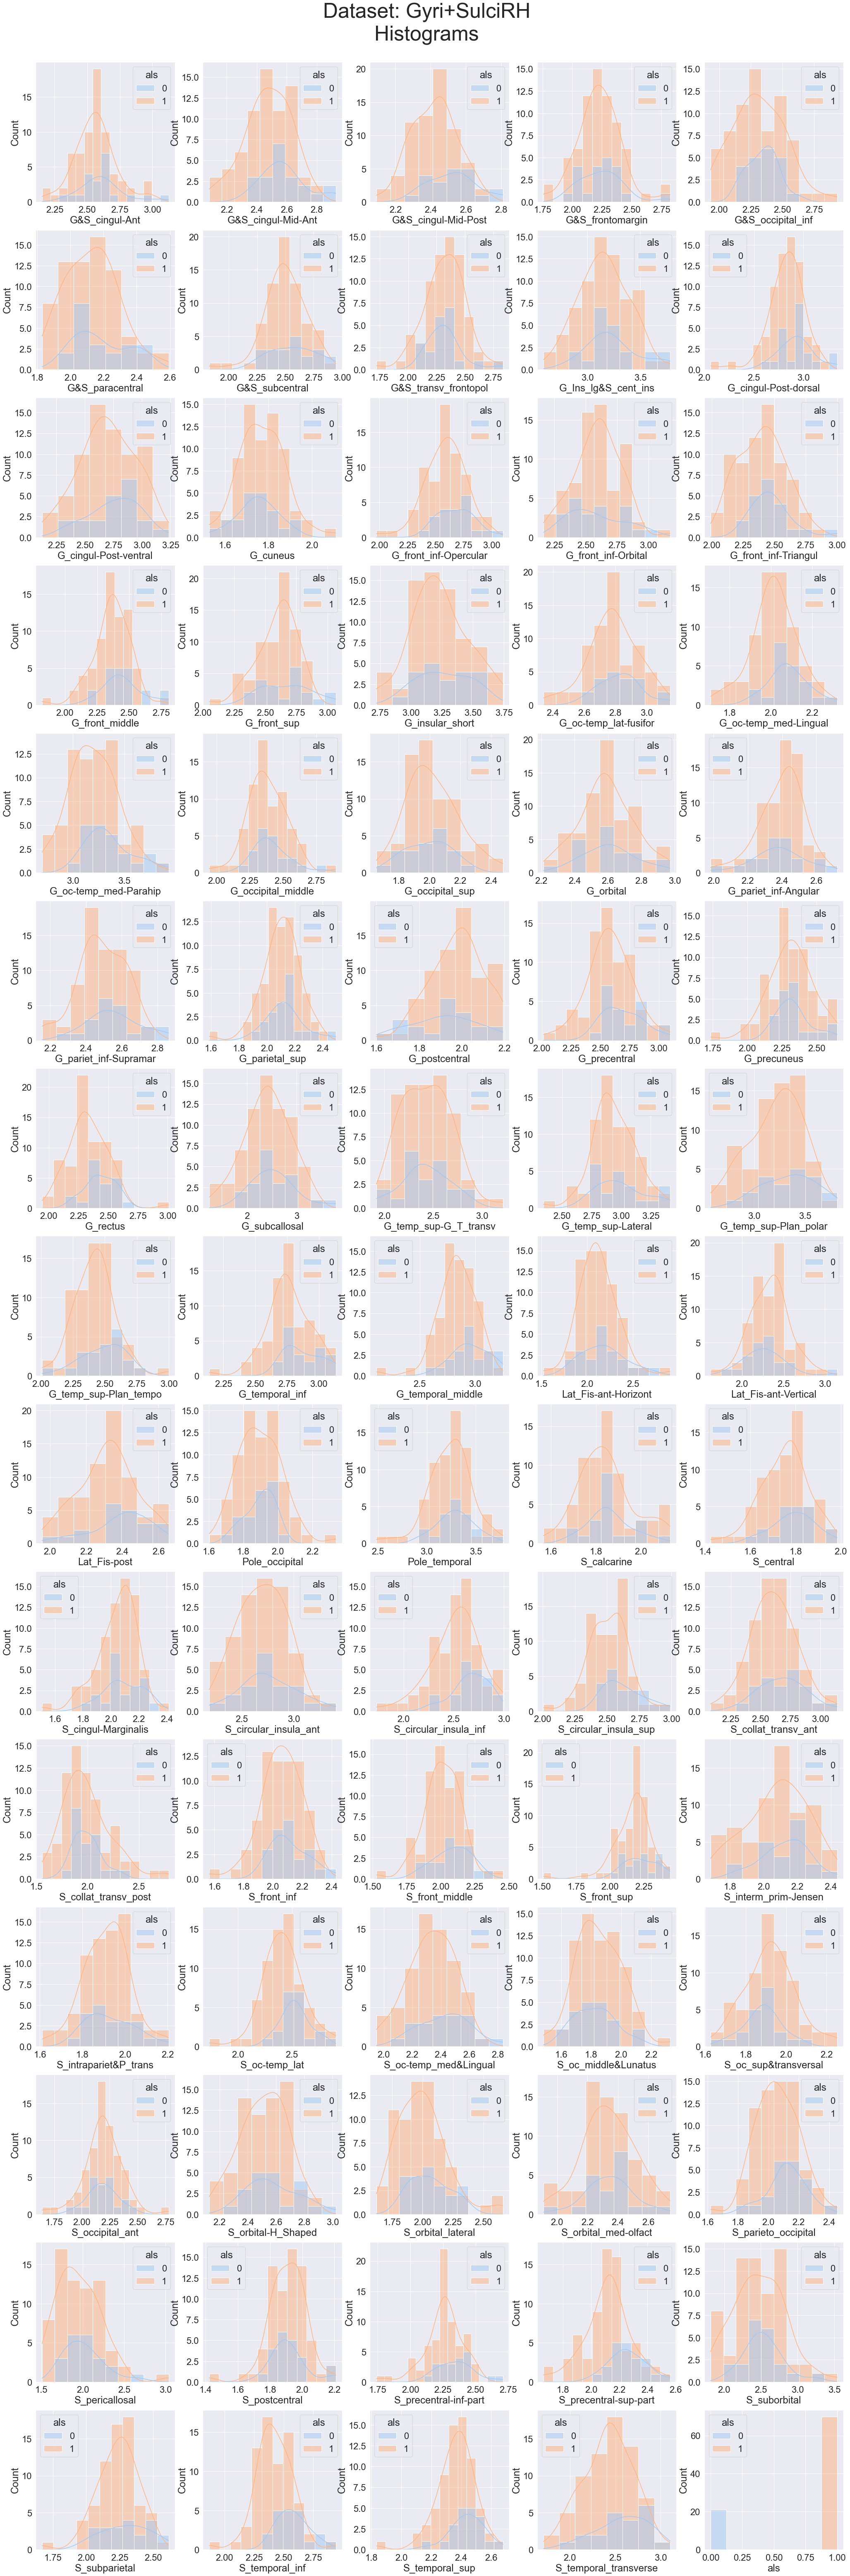

In [32]:
# Plot grid with linear regressions and display R-Squared for each model
fig, axes = plt.subplots(15, 5, figsize = (35, 100))  
fig.subplots_adjust(top = 0.96);
fig.suptitle('Dataset: Gyri+SulciRH\nHistograms', fontsize = 50)

gr = 1;
for i in range(0, 15):
    for j in range(0, 5):
        sns.histplot(ax = axes[i, j],
                     x = gsRHData.iloc[:,gr],
                     hue = gsRHData['als'],
                     palette = 'pastel',
                     kde = True)
        gr = gr + 1

In [36]:
# Population difference
ctlData = volumeData[volumeData['als'] == 0]
alsData = volumeData[volumeData['als'] == 1]

alpha = 0.05;
resultsFeature = []
resultsPvalue = []
resultsTstat = []

print("| feature | pvalue | tstat |")
print("| --- | --- | --- |")
for i in range(1, volumeColumns):
    tstat, pvalue = stats.ttest_ind(ctlData.iloc[:,i], alsData.iloc[:,i])
    if(pvalue < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        print("| %s | %f | %f |" %(ctlData.columns[i], pvalue, tstat))
        

resultsVolume = pd.DataFrame(data={"feature":resultsFeature, 
                                   "pvalue":resultsPvalue, 
                                   "tstat":resultsTstat})
#resultsVolume


| feature | pvalue | tstat |
| --- | --- | --- |
| Brain-Stem | 0.002263 | 3.144256 |
| Left-Amygdala | 0.007768 | 2.723759 |
| Left-Caudate | 0.045042 | 2.032907 |
| Left-Hippocampus | 0.003017 | 3.049686 |
| Left-Putamen | 0.012819 | 2.540013 |
| Left-Thalamus-Proper | 0.008218 | 2.703528 |
| Left-VentralDC | 0.001147 | 3.360653 |
| Right-Amygdala | 0.004402 | 2.922471 |
| Right-Hippocampus | 0.002869 | 3.066415 |
| Right-Putamen | 0.015837 | 2.459725 |
| Right-Thalamus-Proper | 0.003177 | 3.032492 |
| Right-VentralDC | 0.002715 | 3.084619 |
| als | 0.000000 | -inf |
| group | 0.000000 | -9.864338 |


In [37]:
# Population difference
ctlData = gsLHData[gsLHData['als'] == 0]
alsData = gsLHData[gsLHData['als'] == 1]

alpha = 0.05;

resultsFeature = []
resultsPvalue = []
resultsTstat = []

print("| feature | pvalue | tstat |")
print("| --- | --- | --- |")
for i in range(1, gsLHColumns):
    tstat, pvalue = stats.ttest_ind(ctlData.iloc[:,i], alsData.iloc[:,i])
    if(pvalue < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        print("| %s | %f | %f |" %(ctlData.columns[i], pvalue, tstat))
        
resultsGsLH = pd.DataFrame(data={"feature":resultsFeature, 
                                   "pvalue":resultsPvalue, 
                                   "tstat":resultsTstat})
#resultsGsLH

| feature | pvalue | tstat |
| --- | --- | --- |
| G&S_cingul-Ant | 0.000745 | 3.493471 |
| G&S_cingul-Mid-Post | 0.002188 | 3.155263 |
| G_cingul-Post-dorsal | 0.020414 | 2.360901 |
| G_cingul-Post-ventral | 0.005556 | 2.842116 |
| G_front_middle | 0.031206 | 2.189111 |
| G_insular_short | 0.016624 | 2.441054 |
| G_oc-temp_med-Lingual | 0.018476 | 2.400056 |
| G_subcallosal | 0.027091 | 2.247324 |
| G_temp_sup-Plan_tempo | 0.009874 | 2.636848 |
| G_temporal_inf | 0.008626 | 2.686032 |
| G_temporal_middle | 0.044824 | 2.035017 |
| Lat_Fis-post | 0.010700 | 2.607305 |
| S_circular_insula_sup | 0.013737 | 2.513950 |
| S_front_sup | 0.020480 | 2.359628 |
| S_oc-temp_med&Lingual | 0.018902 | 2.391153 |
| S_orbital-H_Shaped | 0.000951 | 3.418706 |
| S_precentral-inf-part | 0.032513 | 2.172025 |
| S_precentral-sup-part | 0.019934 | 2.370273 |
| S_temporal_sup | 0.008444 | 2.693741 |
| als | 0.000000 | -inf |
| group | 0.000000 | -9.864338 |


In [39]:
# Population difference
ctlData = gsRHData[gsRHData['als'] == 0]
alsData = gsRHData[gsRHData['als'] == 1]

alpha = 0.05;

resultsFeature = []
resultsPvalue = []
resultsTstat = []

print("| feature | pvalue | tstat |")
print("| --- | --- | --- |")
for i in range(1, gsRHColumns):
    tstat, pvalue = stats.ttest_ind(ctlData.iloc[:,i], alsData.iloc[:,i])
    if(pvalue < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        print("| %s | %f | %f |" %(ctlData.columns[i], pvalue, tstat))
        
resultsGsRH = pd.DataFrame(data={"feature":resultsFeature, 
                                   "pvalue":resultsPvalue, 
                                   "tstat":resultsTstat})
#resultsGsRH

| feature | pvalue | tstat |
| --- | --- | --- |
| G&S_cingul-Mid-Ant | 0.004737 | 2.897282 |
| G&S_cingul-Mid-Post | 0.001211 | 3.343762 |
| G_cingul-Post-dorsal | 0.020027 | 2.368439 |
| G_front_inf-Opercular | 0.022769 | 2.317535 |
| G_front_middle | 0.016157 | 2.452031 |
| G_oc-temp_med-Lingual | 0.010179 | 2.625706 |
| G_oc-temp_med-Parahip | 0.006706 | 2.776123 |
| G_pariet_inf-Supramar | 0.036646 | 2.121660 |
| G_precentral | 0.020529 | 2.358689 |
| G_rectus | 0.013671 | 2.515779 |
| G_temporal_inf | 0.004761 | 2.895550 |
| G_temporal_middle | 0.003627 | 2.988167 |
| S_circular_insula_inf | 0.009561 | 2.648650 |
| S_circular_insula_sup | 0.003703 | 2.981165 |
| S_front_middle | 0.040235 | 2.081766 |
| S_oc-temp_lat | 0.015342 | 2.471904 |
| S_oc-temp_med&Lingual | 0.020603 | 2.357264 |
| S_precentral-inf-part | 0.007715 | 2.726205 |
| S_precentral-sup-part | 0.000480 | 3.625313 |
| S_temporal_inf | 0.000088 | 4.110700 |
| S_temporal_sup | 0.012058 | 2.562936 |
| S_temporal_trans

In [13]:
# Population difference
ctlLH = gsLHData[gsLHData['als'] == 0]
ctlRH = gsRHData[gsRHData['als'] == 0]

alpha = 0.05;

resultsFeature = []
resultsPvalue = []
resultsTstat = []

for i in range(1, gsLHColumns):
    tstat, pvalue = stats.ttest_ind(ctlLH.iloc[:,i], ctlRH.iloc[:,i])
    if(pvalue < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        
resultsGsHCtl = pd.DataFrame(data={"feature":resultsFeature, 
                                   "pvalue":resultsPvalue, 
                                   "tstat":resultsTstat})
resultsGsHCtl

feature    pvalue     tstat
0     G&S_cingul-Mid-Ant  0.024021 -2.345970
1        G_insular_short  0.000223  4.058798
2         S_front_middle  0.027703 -2.284827
3         S_temporal_inf  0.000677 -3.685197
4  S_temporal_transverse  0.043964 -2.080137

In [14]:
# Population difference
alsLH = gsLHData[gsLHData['als'] == 1]
alsRH = gsRHData[gsRHData['als'] == 1]

alpha = 0.05;

resultsFeature = []
resultsPvalue = []
resultsTstat = []

for i in range(1, gsLHColumns):
    tstat, pvalue = stats.ttest_ind(alsLH.iloc[:,i], alsRH.iloc[:,i])
    if(pvalue < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        
resultsGsLHAls = pd.DataFrame(data={"feature":resultsFeature, 
                                   "pvalue":resultsPvalue, 
                                   "tstat":resultsTstat})
resultsGsLHAls

feature    pvalue     tstat
0        G&S_frontomargin  0.025863 -2.252593
1     G_Ins_lg&S_cent_ins  0.002008 -3.149147
2     G_front_inf-Orbital  0.030648  2.184052
3          G_front_middle  0.047879 -1.996207
4         G_insular_short  0.000039  4.249556
5   G_oc-temp_med-Lingual  0.002530 -3.076068
6             G_precuneus  0.018193  2.390131
7                G_rectus  0.036003  2.117593
8    Lat_Fis-ant-Vertical  0.004574 -2.882744
9            Lat_Fis-post  0.027024 -2.235000
10            S_calcarine  0.002553 -3.073131
11              S_central  0.031720  2.169979
12    S_cingul-Marginalis  0.031549  2.172203
13  S_circular_insula_inf  0.007840  2.698314
14  S_circular_insula_sup  0.009601 -2.626510
15         S_front_middle  0.035354 -2.125167
16   S_interm_prim-Jensen  0.000619  3.503661
17  S_intrapariet&P_trans  0.004151  2.915023
18          S_postcentral  0.032986  2.153888
19           S_suborbital  0.001859 -3.173157
20          S_subparietal  0.036926  2.107013
21         S_temporal_inf  0.014139 -2.485296
22         S_temporal_sup  0.002373 -3.096385
23  S_temporal_transverse  0.000723 -3.458424

In [41]:
# Population difference
alsSalsVolumeData = volumeData[gsLHData['group'] == 1]
alsC9oVolumeData = volumeData[gsLHData['group'] == 2]
alsSalsLHData = gsLHData[gsLHData['group'] == 1]
alsC9oLHData = gsLHData[gsLHData['group'] == 2]
alsSalsRHData = gsRHData[gsLHData['group'] == 1]
alsC9oRHData = gsRHData[gsLHData['group'] == 2]

alpha = 0.05;

resultsFeature = []
resultsPvalue = []
resultsTstat = []

print("Sals vs C9o Volume")
print("| feature | pvalue | tstat |")
print("| --- | --- | --- |")
for i in range(1, volumeColumns):
    tstat, pvalue = stats.ttest_ind(alsSalsVolumeData.iloc[:,i], alsC9oVolumeData.iloc[:,i])
    if(pvalue < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        print("| %s | %f | %f |" %(ctlData.columns[i], pvalue, tstat))
        
resultsSalsC9oVolume = pd.DataFrame(data={"feature":resultsFeature, 
                                          "pvalue":resultsPvalue, 
                                          "tstat":resultsTstat})

resultsFeature = []
resultsPvalue = []
resultsTstat = []

print("Sals vs C9o LH")
print("| feature | pvalue | tstat |")
print("| --- | --- | --- |")
for i in range(1, gsLHColumns):
    tstatLH, pvalueLH = stats.ttest_ind(alsSalsLHData.iloc[:,i], alsC9oLHData.iloc[:,i])
    if(pvalueLH < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        print("| %s | %f | %f |" %(ctlData.columns[i], pvalue, tstat))
        
resultsSalsC9oLH = pd.DataFrame(data={"feature":resultsFeature, 
                                      "pvalue":resultsPvalue, 
                                      "tstat":resultsTstat})
  
resultsFeature = []
resultsPvalue = []
resultsTstat = []

print("Tabela: Resultados do dataset Gyri+SulciLH comparando ELAs e C9orf72. Todas as Features que rejeitaram a hipótese nula.")
print("| feature | pvalue | tstat |")
print("| --- | --- | --- |")
for i in range(1, gsRHColumns):
    tstatRH, pvalueRH = stats.ttest_ind(alsSalsRHData.iloc[:,i], alsC9oRHData.iloc[:,i])
    if(pvalueRH < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        print("| %s | %f | %f |" %(ctlData.columns[i], pvalue, tstat))
        
resultsSalsC9oRH = pd.DataFrame(data={"feature":resultsFeature, 
                                      "pvalue":resultsPvalue, 
                                      "tstat":resultsTstat})

Sals vs C9o Volume
| feature | pvalue | tstat |
| --- | --- | --- |
| G&S_transv_frontopol | 0.000263 | 3.984912 |
| G_cingul-Post-dorsal | 0.000392 | 3.853952 |
| G_front_inf-Orbital | 0.000967 | 3.549258 |
| G_front_sup | 0.000164 | 4.139043 |
| G_oc-temp_lat-fusifor | 0.000827 | 3.602657 |
| G_occipital_sup | 0.001817 | 3.329818 |
| G_parietal_sup | 0.000000 | -inf |
Sals vs C9o LH
| feature | pvalue | tstat |
| --- | --- | --- |
| G&S_cingul-Mid-Ant | 0.000000 | -inf |
| G&S_cingul-Mid-Post | 0.000000 | -inf |
| G_front_inf-Opercular | 0.000000 | -inf |
| G_front_middle | 0.000000 | -inf |
| G_oc-temp_med-Lingual | 0.000000 | -inf |
| G_occipital_sup | 0.000000 | -inf |
| G_pariet_inf-Angular | 0.000000 | -inf |
| G_parietal_sup | 0.000000 | -inf |
| G_precuneus | 0.000000 | -inf |
| G_temporal_middle | 0.000000 | -inf |
| S_circular_insula_ant | 0.000000 | -inf |
| S_circular_insula_sup | 0.000000 | -inf |
| S_collat_transv_ant | 0.000000 | -inf |
| S_front_inf | 0.000000 | -inf |

In [42]:
# Population difference
alsSalsVolumeData = volumeData[gsLHData['group'] == 1]
alsVapVolumeData = volumeData[gsLHData['group'] == 3]
alsSalsLHData = gsLHData[gsLHData['group'] == 1]
alsVapLHData = gsLHData[gsLHData['group'] == 3]
alsSalsRHData = gsRHData[gsLHData['group'] == 1]
alsVapRHData = gsRHData[gsLHData['group'] == 3]

alpha = 0.05;

resultsFeature = []
resultsPvalue = []
resultsTstat = []

print("Tabela: Resultados do dataset Volume comparando ELAs e VAPB. Todas as Features que rejeitaram a hipótese nula.")
print("| feature | pvalue | tstat |")
print("| --- | --- | --- |")
for i in range(1, volumeColumns):
    tstat, pvalue = stats.ttest_ind(alsSalsVolumeData.iloc[:,i], alsVapVolumeData.iloc[:,i])
    if(pvalue < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        print("| %s | %f | %f |" %(ctlData.columns[i], pvalue, tstat))
        
resultsSalsVapVolume = pd.DataFrame(data={"feature":resultsFeature, 
                                          "pvalue":resultsPvalue, 
                                          "tstat":resultsTstat})

resultsFeature = []
resultsPvalue = []
resultsTstat = []

print("Tabela: Resultados do dataset Gyri+SulciLH comparando ELAs e VAPB. Todas as Features que rejeitaram a hipótese nula.")
print("| feature | pvalue | tstat |")
print("| --- | --- | --- |")
for i in range(1, gsLHColumns):
    tstatLH, pvalueLH = stats.ttest_ind(alsSalsLHData.iloc[:,i], alsVapLHData.iloc[:,i])
    if(pvalueLH < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        print("| %s | %f | %f |" %(ctlData.columns[i], pvalue, tstat))
        
resultsSalsVapLH = pd.DataFrame(data={"feature":resultsFeature, 
                                      "pvalue":resultsPvalue, 
                                      "tstat":resultsTstat})

resultsFeature = []
resultsPvalue = []
resultsTstat = []

print("Tabela: Resultados do dataset Gyri+SulciRH comparando ELAs e VAPB. Todas as Features que rejeitaram a hipótese nula.")
print("| feature | pvalue | tstat |")
print("| --- | --- | --- |")
for i in range(1, gsRHColumns):
    tstatRH, pvalueRH = stats.ttest_ind(alsSalsRHData.iloc[:,i], alsVapRHData.iloc[:,i])
    if(pvalueRH < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        print("| %s | %f | %f |" %(ctlData.columns[i], pvalue, tstat))
        
resultsSalsVapRH = pd.DataFrame(data={"feature":resultsFeature, 
                                      "pvalue":resultsPvalue, 
                                      "tstat":resultsTstat})

Tabela: Resultados do dataset Volume comparando ELAs e VAPB. Todas as Features que rejeitaram a hipótese nula.
| feature | pvalue | tstat |
| --- | --- | --- |
| G_front_inf-Orbital | 0.039936 | -2.105254 |
| G_front_middle | 0.034395 | 2.170370 |
| G_parietal_sup | 0.000000 | -inf |
Tabela: Resultados do dataset Gyri+SulciLH comparando ELAs e VAPB. Todas as Features que rejeitaram a hipótese nula.
| feature | pvalue | tstat |
| --- | --- | --- |
| S_central | 0.000000 | -inf |
| S_oc-temp_med&Lingual | 0.000000 | -inf |
| S_oc_middle&Lunatus | 0.000000 | -inf |
| S_oc_sup&transversal | 0.000000 | -inf |
| group | 0.000000 | -inf |
Tabela: Resultados do dataset Gyri+SulciRH comparando ELAs e VAPB. Todas as Features que rejeitaram a hipótese nula.
| feature | pvalue | tstat |
| --- | --- | --- |
| G_postcentral | 0.000000 | -inf |
| G_precentral | 0.000000 | -inf |
| G_temp_sup-Plan_polar | 0.000000 | -inf |
| S_circular_insula_inf | 0.000000 | -inf |
| group | 0.000000 | -inf |


In [43]:
# Population difference
alsC9oVolumeData = volumeData[gsLHData['group'] == 2]
alsVapVolumeData = volumeData[gsLHData['group'] == 3]
alsC9oLHData = gsLHData[gsLHData['group'] == 2]
alsVapLHData = gsLHData[gsLHData['group'] == 3]
alsC9oRHData = gsRHData[gsLHData['group'] == 2]
alsVapRHData = gsRHData[gsLHData['group'] == 3]

alpha = 0.05;

resultsFeature = []
resultsPvalue = []
resultsTstat = []

print("Tabela: Resultados do dataset Volume comparando C9orf72 e VAPB. Todas as Features que rejeitaram a hipótese nula.")
print("| feature | pvalue | tstat |")
print("| --- | --- | --- |")
for i in range(1, volumeColumns):
    tstat, pvalue = stats.ttest_ind(alsC9oVolumeData.iloc[:,i], alsVapVolumeData.iloc[:,i])
    if(pvalue < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        print("| %s | %f | %f |" %(ctlData.columns[i], pvalue, tstat))
        
resultsC9oVapVolume = pd.DataFrame(data={"feature":resultsFeature, 
                                      "pvalue":resultsPvalue, 
                                      "tstat":resultsTstat})
        
resultsFeature = []
resultsPvalue = []
resultsTstat = []

print("Tabela: Resultados do dataset Gyri+SulciLH comparando C9orf72 e VAPB. Todas as Features que rejeitaram a hipótese nula.")
print("| feature | pvalue | tstat |")
print("| --- | --- | --- |")
for i in range(1, gsLHColumns):
    tstatLH, pvalueLH = stats.ttest_ind(alsC9oLHData.iloc[:,i], alsVapLHData.iloc[:,i])
    if(pvalueLH < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        print("| %s | %f | %f |" %(ctlData.columns[i], pvalue, tstat))
        
resultsC9oVapLH = pd.DataFrame(data={"feature":resultsFeature, 
                                      "pvalue":resultsPvalue, 
                                      "tstat":resultsTstat})

resultsFeature = []
resultsPvalue = []
resultsTstat = []

print("Tabela: Resultados do dataset Gyri+SulciRH comparando C9orf72 e VAPB. Todas as Features que rejeitaram a hipótese nula.")
print("| feature | pvalue | tstat |")
print("| --- | --- | --- |")
for i in range(1, gsRHColumns):
    tstatRH, pvalueRH = stats.ttest_ind(alsC9oRHData.iloc[:,i], alsVapRHData.iloc[:,i])
    if(pvalueRH < alpha):
        resultsFeature.append(ctlData.columns[i]);
        resultsPvalue.append(pvalue);
        resultsTstat.append(tstat)
        print("| %s | %f | %f |" %(ctlData.columns[i], pvalue, tstat))
        
resultsC9oVapRH = pd.DataFrame(data={"feature":resultsFeature, 
                                      "pvalue":resultsPvalue, 
                                      "tstat":resultsTstat})

Tabela: Resultados do dataset Volume comparando C9orf72 e VAPB. Todas as Features que rejeitaram a hipótese nula.
| feature | pvalue | tstat |
| --- | --- | --- |
| G&S_paracentral | 0.044352 | -2.079679 |
| G&S_transv_frontopol | 0.000064 | -4.489778 |
| G_Ins_lg&S_cent_ins | 0.044236 | -2.080886 |
| G_cingul-Post-dorsal | 0.017932 | -2.474235 |
| G_cingul-Post-ventral | 0.009285 | -2.740935 |
| G_front_inf-Opercular | 0.016558 | -2.507323 |
| G_front_inf-Orbital | 0.000003 | -5.452097 |
| G_front_sup | 0.000308 | -3.970241 |
| G_oc-temp_lat-fusifor | 0.032265 | -2.222657 |
| G_oc-temp_med-Lingual | 0.002302 | -3.268099 |
| G_occipital_middle | 0.039590 | -2.131325 |
| G_occipital_sup | 0.000008 | -5.163438 |
| G_parietal_sup | 0.000000 | -inf |
Tabela: Resultados do dataset Gyri+SulciLH comparando C9orf72 e VAPB. Todas as Features que rejeitaram a hipótese nula.
| feature | pvalue | tstat |
| --- | --- | --- |
| G&S_cingul-Mid-Ant | 0.000000 | -inf |
| G&S_cingul-Mid-Post | 0.000000 